**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#Project Lasso Regression to predict breast cancer
In this project, you will evaluate the features of a dataset to train linear regression and lasso regression models.  
Please reference the video lecture on Lasso Regression for a description of this example dataset and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  
Note, in the lecture and in most literature, the Lasso regression regularization parameter is denoted as "lambda", but in the sklearn model, it is called "alpha".

-  **Step 1**:  Download the dataset file from the Github repository for this course (the link is provided in the materials document in the LMS).  Upload the file to your Colab files folder so that you can access it from your script. Read in the provided csv file: "BreastCancerDataset.csv" into a pandas dataframe.  Note the dataset has been prepared to include all the features used in the study as well as a "Diagnosis" column.  You MUST use this file in your project.
-  **Step 2**:  Inspect the dataset, note the features (indep vars) and the result (last column). Drop any unwanted rows or columns from the dataframe (e.g. 'unnamed')
-  **Step 3**:  Read the features (all but the 'Diagnosis' column) into a numpy array.
-  **Step 4**:  Read the results column ('Diagnosis') into the Y variable
-  **Step 5**:  Create a training and test split of 70% train and 30% test from the dataset. Use a random_state of 31.
-  **Step 6**:  Train the Lasso algorithm, using the default fit function (alpha=1.0).  Note that "alpha" in the sklearn model is equivalent to the lecture "lambda".
-  **Step 7**:  Calculate the train and test scores.
-  **Step 8**:  Find the number of non-0 coefficients used.
-  **Step 9**:  Print out the results for the scores and number of coeffs used.
-  **Step 10**: Repeat steps 6-9 for alpha= 0.5, 0.05
-  **Step 11**: Run with Linear regression (alpha=0)
-  **Step 12**: Visualize your output on a Matplotlib graph of Coefficient Magnitudes vs. Coefficient Index for each of the regression equation models computed above.
-  **Step 13**: Find the optimum value for alpha.  Please reference the lecture on guidelines on how to evaluate when an alpha (lambda) value is trending towards overfitting or underfitting the dataset.

In [1]:
#Project Lasso Regression to predict breast cancer
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#Import the libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Read the project dataset.
#Step 1:  Download the dataset
#         Upload the file to your Colab files folder so that you can access it
#         from your script. Read in the provided csv file: "BreastCancerDataset.csv"
#         into a pandas dataframe.  Note the dataset has been prepared to include all
#         the features used in the study as well as a "Result" column.
#         You MUST use this file in your project.

# TODO:  Your code here...
# Mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
# cd (change directory) to the folder which contains the dataset
# YOUR CODE HERE...
%cd /content/drive/MyDrive/Colab Notebooks/
df = pd.read_csv("./breast_cancer_data.csv")
df.head()

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# get information about the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
#Detect and count missing values (NaN) in the dataset and drop columns with large missing values if necessary
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Step 2:  Inspect the dataset, note the features (indep vars) and the result (last column).
#         Hint:  use the Pandas 'drop' function to remove unwanted rows or columns from the dataframe.
# TODO:  Your code here...

df = df.drop(columns=['Unnamed: 32'])


In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
#find the pairwise correlation of all columns in the cancer dataframe
df.corr()

<ipython-input-7-72476de77f12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [8]:
#drop correlated features that have low correlation with target diagnosis variable

df.drop(['id','fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis = 1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
#Step 3:  Read the features (all but then 'Result' column) into a numpy array.
#         Hint:  Create a column headers array and use that with the Pandas to_numpy() function to create the independent variable X.

X=df.drop(columns=['diagnosis'])


#examine the data with the features necessary
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
#Step 4:  Read the results column ('Result') into the Y variable
#         Hint:  Use the Pandas 'values function or to_numpy() to return a numpy representation of the Result column into a dependent variable Y
# TODO:  Your code here...

Y = df['diagnosis'].to_numpy().reshape(-1, 1)

Y


array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
      

In [11]:
#Encode categorical features as an integer array.

#The input to the modeling algorithm should be an array-like of integers or strings
# We have to represent values taken on by categorical (discrete) features by converting them to ordinal integers.
# I used https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html    to create   a single column of integers (0 to n_categories - 1) for the diagnosis feature.
# The function below wraps all the relevant code for better organization.

from sklearn.preprocessing import OrdinalEncoder

# prepare the target
def prepare_targets(Y):
    oe = OrdinalEncoder()
    oe.fit(Y)
    Y = oe.transform(Y)
    return Y
# prepare the output data
Y = prepare_targets(Y)

In [12]:
#Step 5:  Create a training and test split of 70% train and 30% test from the dataset. Use a random_state of 31.
# TODO:  Your code here...

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=31)


In [13]:
#Step 6:  Train the Lasso algorithm, using the default fit function (alpha=1.0).
#         Note that "alpha" in the sklearn model is equivalent to the lecture "lambda".
#         Hint:  Remember to instantiate the 'Lasso' object before training your model.

lasso1 = Lasso(alpha=1.0)
lasso1.fit(X_train, Y_train)


Lasso()

In [14]:
#Step 7:  Calculate the train and test scores.

train_score = lasso1.score(X_train, Y_train)
test_score = lasso1.score(X_test, Y_test)


In [15]:
#Step 8:  Find the number of non-0 coefficients used.

num_coeffs = np.sum(lasso1.coef_ != 0)


In [16]:
#Step 9:  Print out the results for the scores and number of coeffs used.
# TODO:  Your code here...


print("Lasso Regression (alpha=1.0)")
print("Train Score:", train_score)
print("Test Score:", test_score)
print("Number of Non-zero Coefficients:", num_coeffs)
print()


Lasso Regression (alpha=1.0)
Train Score: 0.5588503195243959
Test Score: 0.5700179566731853
Number of Non-zero Coefficients: 5



In [17]:
#Step 10: Repeat steps 6-9 for alpha= 0.5, 0.05
lasso2 = Lasso(alpha=0.5)
lasso2.fit(X_train, Y_train)

train_score2 = lasso2.score(X_train, Y_train)
test_score2 = lasso2.score(X_test, Y_test)
num_coeffs2 = np.sum(lasso2.coef_ != 0)

print("Lasso Regression (alpha=0.5)")
print("Train Score:", train_score2)
print("Test Score:", test_score2)
print("Number of Non-zero Coefficients:", num_coeffs2)
print()



Lasso Regression (alpha=0.5)
Train Score: 0.6289574562023519
Test Score: 0.6264045351625351
Number of Non-zero Coefficients: 4



In [18]:
lasso3 = Lasso(alpha=0.05)
lasso3.fit(X_train, Y_train)

#n.b:  I am getting a non convergence warning here. So the optimization algorithm does not seem to ever reache a lower value.
# Not quite sure how to overcome that error as I don't understand Lasso that well just yet.

train_score3 = lasso3.score(X_train, Y_train)
test_score3 = lasso3.score(X_test, Y_test)
num_coeffs3 = np.sum(lasso3.coef_ != 0)

print("Lasso Regression (alpha=0.05)")
print("Train Score:", train_score3)
print("Test Score:", test_score3)
print("Number of Non-zero Coefficients:", num_coeffs3)
print()

Lasso Regression (alpha=0.05)
Train Score: 0.6784661389788347
Test Score: 0.651058923473477
Number of Non-zero Coefficients: 7



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.430e+00, tolerance: 9.347e-03
  model = cd_fast.enet_coordinate_descent(


In [19]:
#Step 11: Run with Linear regression (alpha=0)

linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
train_score_linear = linear_reg.score(X_train, Y_train)
test_score_linear = linear_reg.score(X_test, Y_test)
num_coeffs4 = np.sum(linear_reg.coef_ != 0)
print("Linear Regression")
print("Train Score:", train_score_linear)
print("Test Score:", test_score_linear)
print("Number of Non-zero Coefficients:", num_coeffs4)
print()

Linear Regression
Train Score: 0.7848105876548161
Test Score: 0.7304874461160212
Number of Non-zero Coefficients: 31



In [20]:
 num_coeffs_3 = lasso3.coef_[0]
 num_coeffs_3

-1.3347161609497482e-10

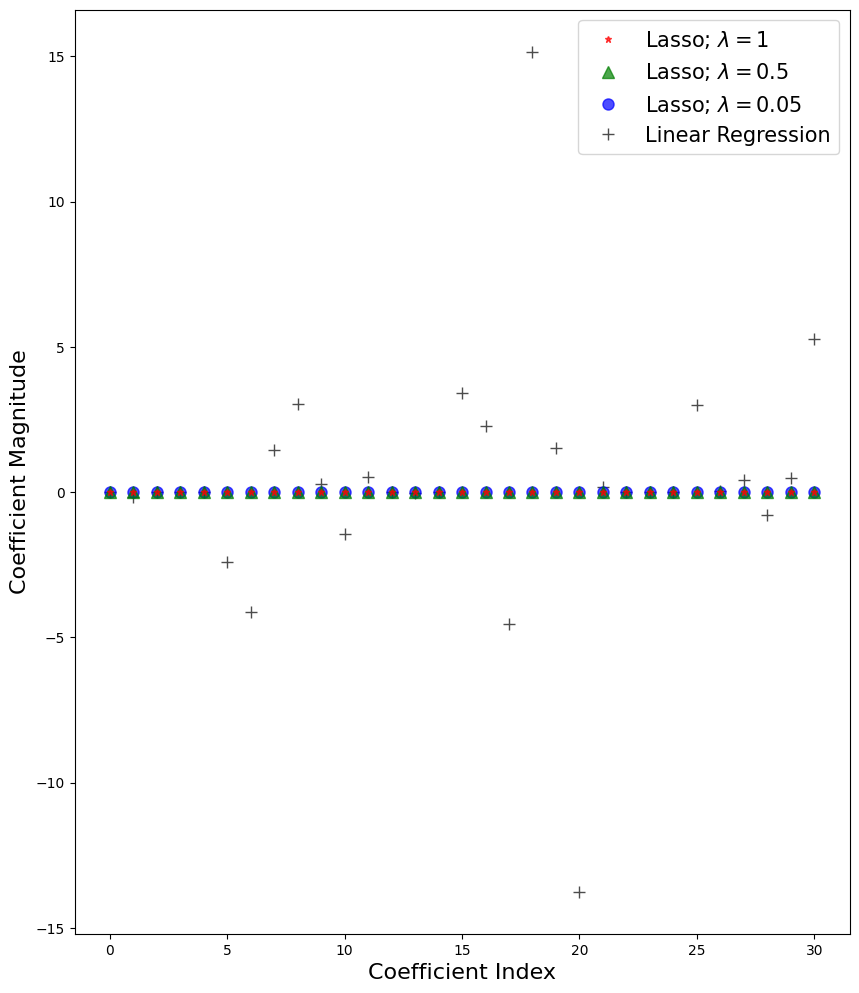

In [21]:
#Step 12: Visualize your ouput on a Matplotlib graph of Coefficient Magnitudes vs. Coefficient Index
#         for each of the regression equation models computed above.
#         Hint:  the following code will create a figure and plot the coefficients for a group of coefficients.
plt.figure(figsize=(10,12))
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.plot(lasso1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\lambda = 1$',zorder=7)

#TODO: Add your other cases here

plt.plot(lasso2.coef_,alpha=0.7,linestyle='none',marker='^',markersize=8,color='green',label=r'Lasso; $\lambda = 0.5$',zorder=6)
plt.plot(lasso3.coef_,alpha=0.7,linestyle='none',marker="o",markersize=8,color='blue',label=r'Lasso; $\lambda = 0.05$',zorder=5)

plt.plot(linear_reg.coef_[0], alpha=0.7, linestyle='none', marker='+', markersize=8, color='black', label='Linear Regression', zorder=4)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=15,loc='best')
plt.show()



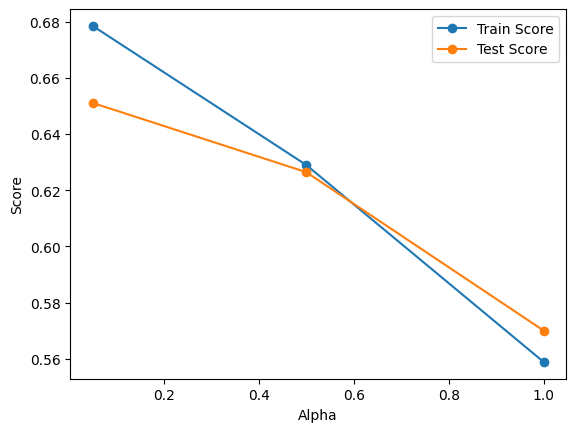

In [22]:


#Step 13: Find the optimum value for alpha.
#         Please reference the lecture on guidelines on how to evaluate when an alpha (lambda)
#         value is trending towards overfitting or underfitting the dataset.
# TODO:  Your code here...
alphas = [1.0, 0.5, 0.05]
train_scores = [train_score, train_score2, train_score3]
test_scores = [test_score, test_score2, test_score3]
plt.plot(alphas, train_scores, marker='o', label='Train Score')
plt.plot(alphas, test_scores, marker='o', label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()